In [9]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [10]:
num_species      = 3
n_min_per_specie = 10

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

#data_dirs = util.choose_species(num_species)
#data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
#print(data_dirs)

data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Batara cinerea/', 
             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/', 
             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiodynastes maculatus/']

In [14]:
print(util.FEATURES)
feat = util.FEATURES[3]
labels_dict, labels, data = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)

['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll']
013-146-Giant-Antshrike.mp3.spec_cent.txt
079.mp3.spec_cent.txt
080.mp3.spec_cent.txt
1000110.mp3.spec_cent.txt
1000111.mp3.spec_cent.txt
1000112.mp3.spec_cent.txt
1000113.mp3.spec_cent.txt
1000115.mp3.spec_cent.txt
1000116.mp3.spec_cent.txt
1000117.mp3.spec_cent.txt
1000118.mp3.spec_cent.txt
1000119.mp3.spec_cent.txt
1000120.mp3.spec_cent.txt
1000121.mp3.spec_cent.txt
1000122.mp3.spec_cent.txt
1000123.mp3.spec_cent.txt
1000124.mp3.spec_cent.txt
1000125.mp3.spec_cent.txt
1000126.mp3.spec_cent.txt
1000129.mp3.spec_cent.txt
Batara%20cinerea.mp3.spec_cent.txt
Batara%20cinerea_Serrania%20de%20Acambuco_Tartagal_Salta_Argentina_27MAR2005%20b_Bernabe%20Lopez-Lanus.mp3.spec_cent.txt
Batara_cinerea.mp3.spec_cent.txt
Batara_cinerea_(E)_EBB.mp3.spec_cent.txt
Batara_cinerea_1991a-FRL_AR_20_1090-1133_2_C.mp3.spec_cent.txt
batara_cinerea_curucutu_lff.mp3.spec_cent.txt
Batara_cinerea_Juq.mp3.spec_cent.txt
Batara_cinerea_MarcosMeloAPA.mp3.spec_ce

In [15]:
print(labels_dict)
print(labels)
print(len(labels))
print(data)
print(len(data))

{'Camptostoma Obsoletum': 1, 'Myiodynastes Maculatus': 2, 'Batara Cinerea': 0}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
110
[[ 3684.55916858   426.76708733  4728.04762871  2408.28559091]
 [ 2462.02467831   281.93186141  3697.38416369  2053.72211251]
 [ 2317.01194178   180.21440264  3352.93651761  2035.41519437]
 [ 3960.91551123   451.8122355   4831.41454761  3001.93604377]
 [ 2320.20956369   476.18170036  4286.42196145  1787.36046213]
 [ 2575.61836163   270.99250194  3604.18340128  1919.03848209]
 [ 2991.15412725   380.04913166  4145.2145451   1203.78392547]
 [ 3414.11141999   820.53653368  4681.37752923     0.        ]
 [ 1578.66428751   793.08444727  4856.03267017   517.41226996]
 [ 1423.653346     542.5119197   4181.81502054   251.34536889]
 [ 2651.22152928   314.00199017  3189.87653174  2110.82684867]


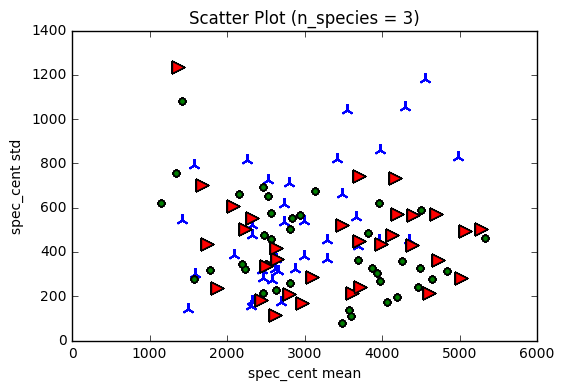

In [16]:
util.plot_scatter(data[:,0], data[:,1], labels, feat + ' mean', feat + ' std')

In [ ]:
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')
scores = cross_val_score(clf, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
print(scores)
print('SVM - {0} {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))